# Step 1. Import Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# Step 2. Import Data

In [2]:
df = pd.read_csv('DATA/Advertising (1).csv', index_col=0) #In data frame TV,radio,newspaper  ka kitna advertisment huha hai wo data se kitna sale badega
df.head(15)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


# Step 3. Data Analysis

In [3]:
print(df.dtypes)
print(df.shape)
print(df.describe())

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object
(200, 4)
               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


# Step 4. Check Assumption

# Assumption 1. There should Be NO Outelier In Data

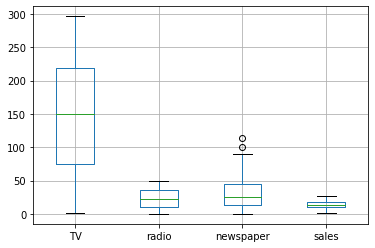

In [4]:
 df.boxplot()#We box plot only for continues numeric data.Linear regression is a parametric algorithm thats why we use assumption as remove outliers

### In data frrame we have all the variable in continues numeric values so we create box plot on all columns by this plot we can se there is no outliers in tv,radio,sales but there is a outlies in newspaper contains two outliers

# Here we not remove outlires because there are 2 outliers in 200 rows data¶

#### NOTE:If Outlier Present then we can treat using below approch
1. Elimination
    1. Directly droping the variable 
   
2. Treate the outlier 
    1. using Caping and Floating Approch
    2. Replace Using Measure of Central Tendencies
    3. Replace Custom Values
    
3. If Cluster is present the leave them as it is

4. Check with client if this is accepteable range or not

# Check Missing Data

In [5]:
df.isnull().sum() # In this data there is no missing values

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [6]:
def check_missing_values(data): #In Case there is a missing values 
    """
    Objective: Check missing values count and percentage in all columns
    
    data: input data frame
    return: Missing Values data Frame
    
    """
    total = data.isnull().sum().sort_values(ascending=False)
    per = (data.isnull().sum()/data.isnull().count() * 100).sort_values(ascending=False)
    missing_data = pd.concat([total,per],axis=1,keys=['Total','Percent'])
    return missing_data

Scretch code Without using function

In [7]:
total = df.isnull().sum().sort_values(ascending=False) #Checking Missing values
total

sales        0
newspaper    0
radio        0
TV           0
dtype: int64

In [8]:
per = (df.isnull().sum()/df.isnull().count() * 100).sort_values(ascending=False) #Checking Missing values in percentage form
per

sales        0.0
newspaper    0.0
radio        0.0
TV           0.0
dtype: float64

In [9]:
missing_df = pd.concat([total,per],axis=1,keys=['Total','Percent']) #Checking Missing values adding Total and Percentage column
missing_df

,Total,Percent
sales,0,0.0
newspaper,0,0.0
radio,0,0.0
TV,0,0.0


In [10]:
miss = check_missing_values(df)
miss

,Total,Percent
sales,0,0.0
newspaper,0,0.0
radio,0,0.0
TV,0,0.0


Note:
    1. If Missing values contains more than 50% of the data then you can drop the entire column
    2. If less than 50% then we can treat those missing values by using Mesure of Central Tendencies
    3. If column is Categorial then you can use Mode to replace missing values.
    4. If column is Continues Numerical Variable then you can use mean if that variable is npot skewd.
    5. If column is contineus Numerical variable with skewd data then we can use Median which is not affected by outliers.
    6. You can Predict the missing values by using other feature (not reconnended)
    7. You can directly ask to client
    8. Common Sence

# Assumption No.2

# Assumption of Linearity:Ever Independent Variable should have a Linear Relationship Dependent Variable

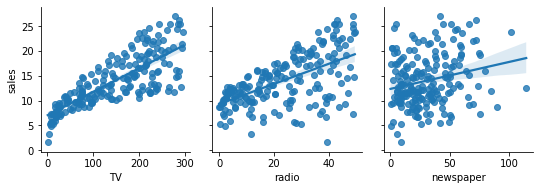

In [11]:
sns.pairplot(df,
            x_vars=["TV","radio","newspaper"],
            y_vars="sales",
            kind='reg') #Kind= reg means regression plot
plt.show()

Note: If the assumption of Linearity is not met then we can drop that variable
    - Strong Positive Linear Relationship in Tv and sales
    - Moderately Styrong Postive Linear Relationship in Radio and sales
    - No Relation in Newspaper Sales also the C.I(Confedence Interval) is also high(TV and radio as Low Confedence Interval )

In [12]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [13]:
feature_cols = ['TV','radio','newspaper']
X = df[feature_cols]
y=df.sales

In [14]:
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


# Assumption NO.3

Assumption of normality: The dependent variable should follow an approximate nprmal distribution

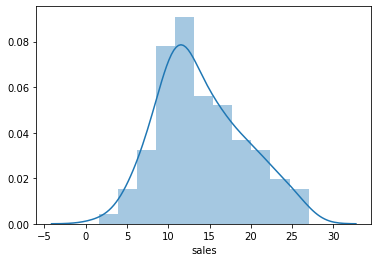

In [15]:
sns.distplot(y,hist=True)
plt.show()

Sale variable is meeting the assumption and we can se the approximate normal distribution

Note: if its not normal of if its skewed plot then we can transform the column in different transform 
    1.Log transform
        - Most of the time we prefer log transform because its help smoothing the cure
    2.SQRT Transform
        - In square root transform we can see pick and some times its also helps in curve smoothing

Code to convert log transform
y_log = np.log(y)
sns.distplot(y.log,hist=True)

Note: if data is approximate normal then dont trtansform cause you will get skewed data

Note: For good pratice make sure that your X variable does not contain high skewness and if its approximently normal then its good 

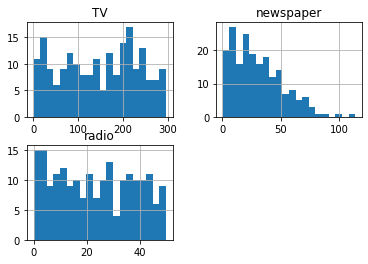

In [16]:
# Check hist for all variables
X.hist(bins=20)
plt.show()

In [17]:
data_num_skew = X.apply(lambda x: skew(x.dropna()))
data_num_skewed = data_num_skew[(data_num_skew > 0.75) | (data_num_skew < -0.75)] #| and operation

print(data_num_skew)
print(data_num_skewed)

TV          -0.069328
radio        0.093467
newspaper    0.887996
dtype: float64
newspaper    0.887996
dtype: float64


In [18]:
# apply log + 1 transformation for all numeric feature with Skewness over 0.75
X[data_num_skewed.index] = np.log1p(X[data_num_skewed.index])

- Range of Skewness is -1 to 1 and value close to 0 means normal distribution

<function matplotlib.pyplot.show(*args, **kw)>

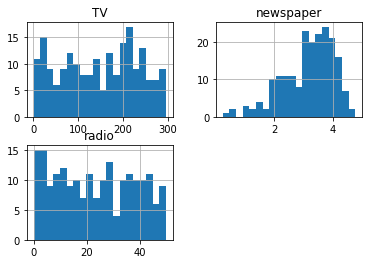

In [19]:
# Check hist for all vatriables after log tranformation of newspaper 
X.hist(bins=20)
plt.show

Note: Types of models
    
    Log - Transform
    Level - Original
    
    X     Y
    log - log
    log - level
    level- log
    level- level

# Assumption No.4

- Multicolinearity is problem where one variable is dependent on other, we want dependency between x and y variable but not in the X variable,so if X variable are denpend on each other then the model will not be good
- To check the multicolinearity we can use the pearson correlation or VIF(Variance inflation Factor)

# Pearson Correlation

In [20]:
corr_df = X.corr(method="pearson")
print(corr_df)

                 TV     radio  newspaper
TV         1.000000  0.054809   0.030951
radio      0.054809  1.000000   0.251909
newspaper  0.030951  0.251909   1.000000


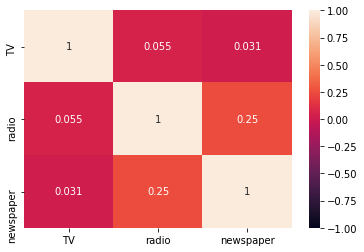

In [21]:
sns.heatmap(corr_df, vmax=1.0, vmin=-1.0, annot=True)
plt.show()

- We want value close to 0 means that is not correleted with each other

# Note: If the correlation is high betyween two variable then drop one beacuse both variables carrying the similar information so eliminate the variable but think logically

# Check VIF

- Sometimes the correlation matrix alone will not help you to check the multicolinearity so you can use VIF

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_df = pd.DataFrame()
vif_df["Features"] = X.columns
vif_df["VIF Factore"] = [vif(X.values, i) for i in range(X.shape[1])]
vif_df.round(2)

,Features,VIF Factore
0,TV,3.39
1,radio,3.63
2,newspaper,5.44


- Less than 5 value is good in VIF which represent no multicolinearity

Note: Once you eliminate one variable based on VIF score then other variables VIF also change and it will decrease so never eliminate all variables so Remove variables with highest value and the run the function again. Also use domain Knowledge dont just depend on VIF values.

- Normilazation

# Train and Test

In [23]:
from sklearn.model_selection import train_test_split

# we taking test data as 80% and test data we take 20%
# >1000 --> TEST SIZE = 0.3
# <1000 --> TEST SIZE = 0.2

#Split the data into test and train 

X_train, X_test, y_train, y_test = train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  random_state=10)

In [24]:
print(X_train.shape) #3 means 3 columns in X in y there is only 1 column
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(160, 3)
(160,)
(40, 3)
(40,)


In [25]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)


In [26]:
X_train_scale

array([[-1.29793425,  1.31029192, -1.35769759],
       [-0.30629937, -0.1791682 , -0.66511937],
       [-0.02736365,  0.49282078, -0.57935984],
       [-1.25492655,  0.25727826, -0.06508874],
       [ 0.8069859 ,  1.89914824,  0.59493927],
       [-1.4539908 ,  0.74914648, -0.12957941],
       [ 0.5255926 , -0.34543351, -0.20982097],
       [ 1.06871853, -0.94121756, -0.95883841],
       [-1.69360518,  0.40968813,  0.69747024],
       [-0.07282895, -0.54633743,  0.17393068],
       [-1.01776975, -0.6641087 , -0.1863038 ],
       [ 0.75906302, -0.955073  ,  0.20720434],
       [ 1.85883158,  0.97776129,  1.68208141],
       [ 0.22576743,  1.01239989, -1.12041776],
       [ 1.13384449, -1.18368781,  0.08158519],
       [-1.12590342, -1.39844717, -0.01904066],
       [ 1.6192172 ,  1.85065419,  0.70801402],
       [ 0.66321727,  0.58288116,  0.62358633],
       [-0.13303974, -1.19754325, -0.89144395],
       [-0.96124533, -0.72645819,  0.56851678],
       [-1.54492138, -0.42856617,  0.025

In [27]:
from sklearn import linear_model
dir(linear_model)

['ARDRegression',
 'BayesianRidge',
 'ElasticNet',
 'ElasticNetCV',
 'Hinge',
 'Huber',
 'HuberRegressor',
 'Lars',
 'LarsCV',
 'Lasso',
 'LassoCV',
 'LassoLars',
 'LassoLarsCV',
 'LassoLarsIC',
 'LinearRegression',
 'Log',
 'LogisticRegression',
 'LogisticRegressionCV',
 'ModifiedHuber',
 'MultiTaskElasticNet',
 'MultiTaskElasticNetCV',
 'MultiTaskLasso',
 'MultiTaskLassoCV',
 'OrthogonalMatchingPursuit',
 'OrthogonalMatchingPursuitCV',
 'PassiveAggressiveClassifier',
 'PassiveAggressiveRegressor',
 'Perceptron',
 'RANSACRegressor',
 'Ridge',
 'RidgeCV',
 'RidgeClassifier',
 'RidgeClassifierCV',
 'SGDClassifier',
 'SGDRegressor',
 'SquaredLoss',
 'TheilSenRegressor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_bayes',
 '_cd_fast',
 '_coordinate_descent',
 '_huber',
 '_least_angle',
 '_logistic',
 '_omp',
 '_passive_aggressive',
 '_perceptron',
 '_ransac',
 '_ridge',
 '_sag',
 '_

# Model Building

In [28]:
from sklearn.linear_model import LinearRegression

# Creat a model object
lm = LinearRegression()

#train the model object
lm.fit(X_train_scale, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_) 

13.83125
[ 3.55979799  2.786444   -0.04359355]


In [30]:
#pair the feature names with the coefficents
print(list(zip(feature_cols, lm.coef_)))

[('TV', 3.5597979869430008), ('radio', 2.786444004240513), ('newspaper', -0.04359354667533281)]


In [31]:
# Try chaging the value of X

X1=100
X2=100
X3=50

y_pred=13.83125 +(3.5597979869430008*X1) + (2.786444004240513*X2) + (-0.04359354667533281*X3)
print(y_pred)

646.2757717845848


In [32]:
X_test_scale.shape

(40, 3)

In [33]:
y_pred = lm.predict(X_test_scale)
print(y_pred)

[18.15026866 12.96136899 18.05815332 23.66025079 20.68751041 14.26325872
 14.92774472 21.38847375 21.14752911 12.75788534 23.99735583  7.20632737
 12.30777109 19.22813333 19.41581583 13.44985803 19.62619644  9.24667496
 21.1052867  20.87838433 15.52611251 10.91695579 22.82910679 15.82915597
 17.40742204  8.17170435 11.88738387 12.69866637 21.71275044  7.94920205
 12.49118989 20.43292079  4.71443086  4.72126238 16.7504848  15.74384945
  6.74775596 17.73750244  9.01170001 13.60841593]


# Evaluation

R-Square: Tells you how much variablity you can explain in the data with help og regression equation.You will get value in the range of 0 to 1, close to one means good modle and close to 0 means worst model(sometimes very rarely you will get the value less than 0 also)
        It tell you how your regression model is doing in comparison with the mean model. eg if you score is 0.85 the your regression model is doing greater job rather than mean model and if you get a score less than 0 then your mean model is doing better job than your regression model so your regression model is incorrect and mean model is good.if you get acuuracy less than 0.75 then try to tune the model to get improved accuracy

IMP NOTE: In every algorithm we have multiple parameter and dedicated approach for  model tunning but when it comes to regression then feature selection is the best technique to tune the model. So for eg. if your model has 12 variables then you can elemenate few variables based on P values or significance value and dont just rely on P value maybe you can eliminate few imp variable so be carefull when you are doing feature engineering

Adjusted R-Square:
    In Industry we tell adjusted R square not actual R square.Because its adjusted so it does the same job there is major difference between this two. So if you add more and more variable and data points for training data then even if they are not relevent still your R square values will increase but adjusted R square will not increase in few case it will decrease, so if you add relevent data or variable then only your adjusted R square will increase, So thats why adjusted R square has its own reputation when interpreting the linear regression model.So adjusted R square considerd as better matrix because it will work only on significant variables.

RMSE(Root Mean Square Error): RMSE Value should be low as possible and we have to compare this value with Y value so this value should be close to Y_Min then model is doing good job but if the value is close to Y_Max the model is not performing well, there is no range for RMSE value.

If i am trying to generate multiple model then i will calculate RMSE, and in industry prespective i will use RMSE to compare all the models to identify the best model. eg If i trained 3 models and all the models have same R square and adjusted R square then we will compare RMSE for all three models, and models with minimum RMSE is the best models, So basically RMSE value is used to compare diffrent models on same data.

AIC and BIC: We use RMSE when we are using diffrent models for comparison, but when we use diffrent data and same model then we use AIC(Akaike information Criteri) eg. If we use 12 variables for Linear Regression 1 model and 9 variables for Linear Regression 2 we will use AIC score,this should minimum values and min BIC then better the model. 

In [34]:
new_df = pd.DataFrame()
new_df = X_test

new_df["Actual Sales"] = y_test
new_df["Predicated Sales"] = y_pred
new_df

,TV,radio,newspaper,Actual Sales,Predicated Sales
60,210.7,29.5,2.332144,18.4,18.150269
6,8.7,48.9,4.330733,7.2,12.961369
21,218.4,27.7,3.996364,18.0,18.058153
199,283.6,42.0,4.207673,25.5,23.660251
53,216.4,41.7,3.703768,22.6,20.687510
20,147.3,23.9,3.000720,14.6,14.263259
163,188.4,18.1,3.280911,14.9,14.927745
56,198.9,49.4,4.110874,23.7,21.388474
70,216.8,43.9,3.339322,22.3,21.147529
3,17.2,45.9,4.252772,9.3,12.757885


In [35]:
y_pred

array([18.15026866, 12.96136899, 18.05815332, 23.66025079, 20.68751041,
       14.26325872, 14.92774472, 21.38847375, 21.14752911, 12.75788534,
       23.99735583,  7.20632737, 12.30777109, 19.22813333, 19.41581583,
       13.44985803, 19.62619644,  9.24667496, 21.1052867 , 20.87838433,
       15.52611251, 10.91695579, 22.82910679, 15.82915597, 17.40742204,
        8.17170435, 11.88738387, 12.69866637, 21.71275044,  7.94920205,
       12.49118989, 20.43292079,  4.71443086,  4.72126238, 16.7504848 ,
       15.74384945,  6.74775596, 17.73750244,  9.01170001, 13.60841593])

In [36]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

r2 = r2_score(y_test,y_pred)
print("R Square: ",r2)

adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("Adjusted R Square: ",adjusted_r_squared)

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE: ",rmse)

R Square:  0.834801071903532
Adjusted R Square:  0.8322725168816474
RMSE:  2.59297691109306


In [37]:
print(min(y))
print(max(y))

1.6
27.0


RMSE Value is close to min value.The model is best fit model

In [38]:
new_df["Devation"] = new_df["Actual Sales"] - new_df["Predicated Sales"]
new_df.to_csv("Advertising_Pred.csv", header=True, index=False)
new_df.head()

,TV,radio,newspaper,Actual Sales,Predicated Sales,Devation
60,210.7,29.5,2.332144,18.4,18.150269,0.249731
6,8.7,48.9,4.330733,7.2,12.961369,-5.761369
21,218.4,27.7,3.996364,18.0,18.058153,-0.058153
199,283.6,42.0,4.207673,25.5,23.660251,1.839749
53,216.4,41.7,3.703768,22.6,20.687510,1.912490


Regularization:
                Penalty that we implement on model if they contain any insignificat variable or if there predicting wrong values, so we penalize the model to start performing better
        
so We have to types of penalty. Lasso and Ridge
        
Ridge: This is L2 Regression, it reduces the beta values such that the overall impact of the insignificat variable over the model reduces.

# Ridge Regression

In [39]:
from sklearn.linear_model import Ridge

lm_ridge = Ridge(alpha=0.5)
lm_ridge.fit(X_train_scale, y_train)

#print intercept and coefficients of ridge regression
print(lm_ridge.intercept_)
print(lm_ridge.coef_)

#Previous values using Regression
#13.83125
#[ 3.55979799  2.786444   -0.04359355]

13.83125
[ 3.54911904  2.77794305 -0.04114493]


In [40]:
#Linear Regression coefficients
print(list(zip(feature_cols, lm.coef_)))

[('TV', 3.5597979869430008), ('radio', 2.786444004240513), ('newspaper', -0.04359354667533281)]


In [41]:
#Ridge Regression coefficients
print(list(zip(feature_cols, lm_ridge.coef_)))

[('TV', 3.5491190413800897), ('radio', 2.777943045450038), ('newspaper', -0.04114492805041528)]


In [42]:
#prediction using ridge regression
Y_pred_ridge = lm_ridge.predict(X_test_scale)

from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

r2 = r2_score(y_test,Y_pred_ridge)
print("R Square (Ridge): ",r2)

adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("Adjusted R Square(Ridge) : ",adjusted_r_squared)

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE (Ridge) : ",rmse)

R Square (Ridge):  0.8344995268129265
Adjusted R Square(Ridge) :  0.8319663563049611
RMSE (Ridge) :  2.59297691109306


In [43]:
#Linear Regression prediction values

# R Square:  0.834801071903532
# Adjusted R Square:  0.8322725168816474
# RMSE:  2.59297691109306 

Lasso: This is L1 Regression, it forces beta values of insignificat variables as zero, such that there impact is eliminated. 

# Lasso Regression

In [44]:
from sklearn.linear_model import Lasso

lm_Lasso = Lasso(alpha=0.2)
lm_Lasso.fit(X_train_scale, y_train)

#print intercept and coefficients of Lasso regression
print(lm_Lasso.intercept_)
print(lm_Lasso.coef_)


13.83125
[3.37004213 2.58962728 0.        ]


In [45]:
#Coefficients of linear,ridge and Lasso

print("Linear Regression: ",list(zip(feature_cols, lm.coef_)))
print("Ridge Regression: ",list(zip(feature_cols, lm_ridge.coef_)))
print("Lasso Regression: ",list(zip(feature_cols, lm_Lasso.coef_)))

Linear Regression:  [('TV', 3.5597979869430008), ('radio', 2.786444004240513), ('newspaper', -0.04359354667533281)]
Ridge Regression:  [('TV', 3.5491190413800897), ('radio', 2.777943045450038), ('newspaper', -0.04114492805041528)]
Lasso Regression:  [('TV', 3.3700421251750656), ('radio', 2.589627283245022), ('newspaper', 0.0)]


In [46]:
#prediction using Lasso regression
Y_pred_Lasso = lm_Lasso.predict(X_test_scale)

from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

r2 = r2_score(y_test,Y_pred_Lasso)
print("R Square (Lasso): ",r2)

adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("Adjusted R Square(Lasso) : ",adjusted_r_squared)

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE (Lasso) : ",rmse)

R Square (Lasso):  0.8277248930930312
Adjusted R Square(Lasso) :  0.8250880292118021
RMSE (Lasso) :  2.59297691109306


# Comparing with all values(RMSE value) we can conclude that linear regression gives best values for this data